In [1]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd

In [3]:
import sys
import pathlib

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
CLOUD = False

if CLOUD:
    DATA_DIR = pathlib.Path("/")
else:
    ROOT_DIR = pathlib.Path("../")
    DATA_DIR = ROOT_DIR.joinpath("data")

# Data loading

In [6]:
data = pd.read_csv(DATA_DIR.joinpath("gestures/UWaveGestureLibraryAll_TRAIN.tsv"),
                   sep="\t", header=None)

In [7]:
data.head()

0         1         2         3         4         5         6         7    \
0    6 -0.312502 -0.312502 -0.312502 -0.312502 -0.312502 -0.312502 -0.312502   
1    5  1.629721  1.629721  1.629721  1.629721  1.629721  1.629721  1.629721   
2    5  0.665410  0.665410  0.665410  0.665410  0.665410  0.665410  0.665410   
3    3  0.164887  0.164887  0.164887  0.164887  0.164887  0.164887  0.164887   
4    4  1.272493  1.272493  1.272493  1.272493  1.272493  1.272493  1.272493   

        8         9    ...       936       937       938       939       940  \
0 -0.312502 -0.312502  ...  0.512194  0.503002  0.492524  0.482045  0.463662   
1  1.629721  1.629721  ... -0.424252 -0.424252 -0.424252 -0.424414 -0.426015   
2  0.665410  0.665410  ... -0.856895 -0.856895 -0.856895 -0.856895 -0.856895   
3  0.164887  0.164887  ... -0.194748 -0.131015 -0.286569  0.051284  0.389136   
4  1.272493  1.272493  ...  1.852405  1.819330  1.741195  1.624052  1.506909   

        941       942       943       944       945  
0  0.445278  0.426895  0.408511  0.390129  0.371746  
1 -0.437960 -0.449905 -0.461849 -0.473794 -0.485739  
2 -0.856895 -0.856895 -0.856895 -0.856895 -0.856895  
3  0.149143  0.245672  0.437129  0.639840  0.842551  
4  1.439170  1.500978  1.618121  1.735263  1.852405  

[5 rows x 946 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Columns: 946 entries, 0 to 945
dtypes: float64(945), int64(1)
memory usage: 6.5 MB


In [9]:
COLS = ["label"] + [f"{comp}_{i}" for comp in ["x", "y", "z"] for i in range(315)]

In [10]:
data.columns = COLS

In [11]:
data.head()

label       x_0       x_1       x_2       x_3       x_4       x_5  \
0      6 -0.312502 -0.312502 -0.312502 -0.312502 -0.312502 -0.312502   
1      5  1.629721  1.629721  1.629721  1.629721  1.629721  1.629721   
2      5  0.665410  0.665410  0.665410  0.665410  0.665410  0.665410   
3      3  0.164887  0.164887  0.164887  0.164887  0.164887  0.164887   
4      4  1.272493  1.272493  1.272493  1.272493  1.272493  1.272493   

        x_6       x_7       x_8  ...     z_305     z_306     z_307     z_308  \
0 -0.312502 -0.312502 -0.312502  ...  0.512194  0.503002  0.492524  0.482045   
1  1.629721  1.629721  1.629721  ... -0.424252 -0.424252 -0.424252 -0.424414   
2  0.665410  0.665410  0.665410  ... -0.856895 -0.856895 -0.856895 -0.856895   
3  0.164887  0.164887  0.164887  ... -0.194748 -0.131015 -0.286569  0.051284   
4  1.272493  1.272493  1.272493  ...  1.852405  1.819330  1.741195  1.624052   

      z_309     z_310     z_311     z_312     z_313     z_314  
0  0.463662  0.445278  0.426895  0.408511  0.390129  0.371746  
1 -0.426015 -0.437960 -0.449905 -0.461849 -0.473794 -0.485739  
2 -0.856895 -0.856895 -0.856895 -0.856895 -0.856895 -0.856895  
3  0.389136  0.149143  0.245672  0.437129  0.639840  0.842551  
4  1.506909  1.439170  1.500978  1.618121  1.735263  1.852405  

[5 rows x 946 columns]

In [12]:
data.label.value_counts()

5    127
1    122
7    112
6    111
4    110
2    108
3    106
8    100
Name: label, dtype: int64

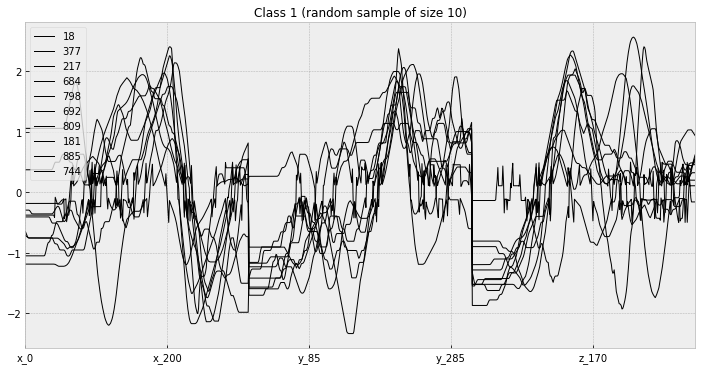

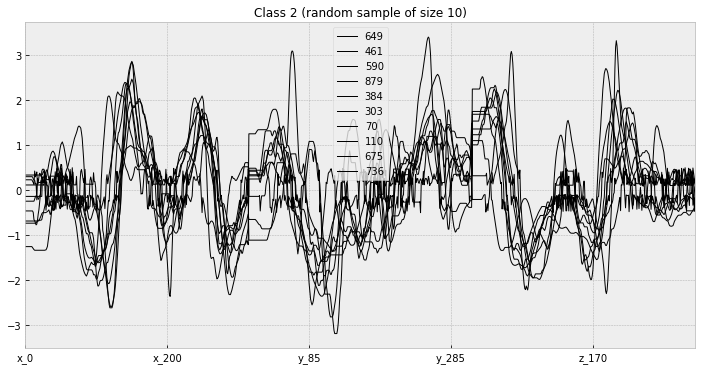

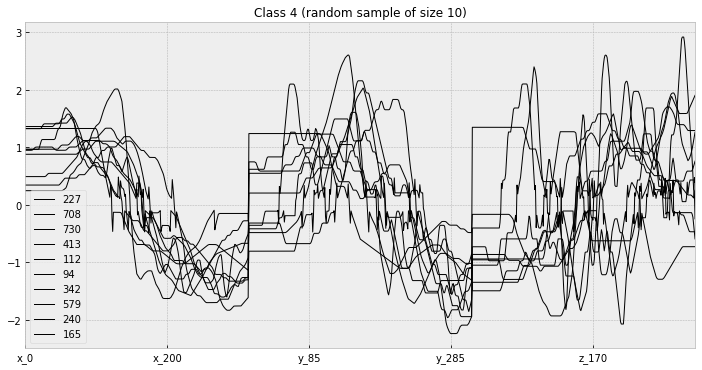

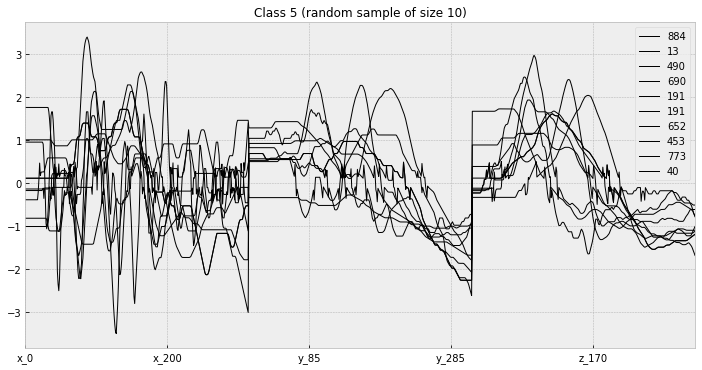

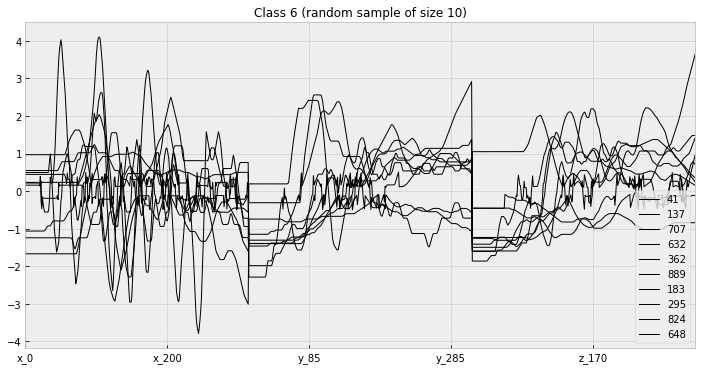

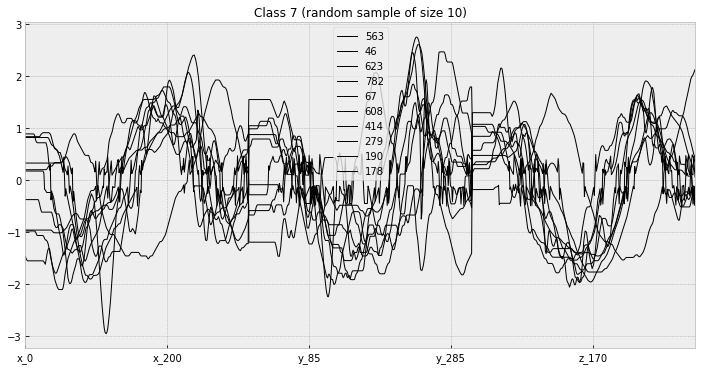

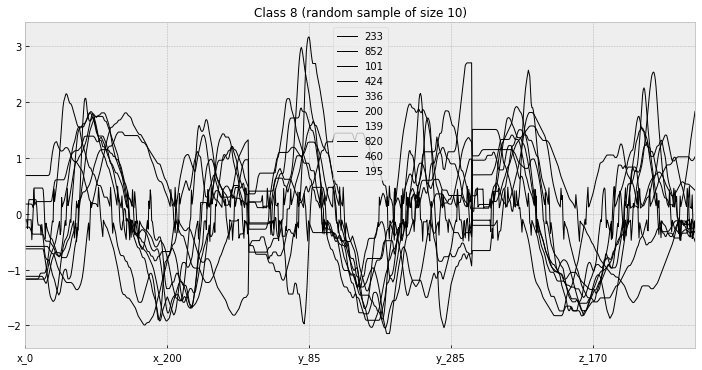

In [13]:
for i in range(1, 9):
    sample = data[data.label==i].sample(10, replace=True)

    plt.figure(figsize=(12,6))
    sample.iloc[:, 1:].transpose().plot(ax=plt.gca(), c="k", linewidth=1)
    plt.title(f"Class {i} (random sample of size 10)", fontsize=12)
    plt.show()

In [14]:
sample.iloc[:, 1:].transpose()

233       852       101       424       336       200       139  \
x_0   -1.121776  0.684112 -0.239783 -1.168650 -0.585766 -0.629090 -1.173712   
x_1   -1.121776  0.684112 -0.239783 -1.168650 -0.585766 -0.629090 -1.173712   
x_2   -1.121776  0.684112 -0.239783 -1.168650 -0.585766 -0.629090 -1.173712   
x_3   -1.121776  0.684112 -0.239783 -1.168650 -0.585766 -0.629090 -1.173712   
x_4   -1.121776  0.684112 -0.239783 -1.168650 -0.585766 -0.629090 -1.173712   
x_5   -1.121776  0.684112 -0.239783 -1.168650 -0.585766 -0.629090 -1.173712   
x_6   -1.121776  0.684112 -0.246395 -1.168650 -0.585766 -0.629090 -1.173712   
x_7   -1.121776  0.684112 -0.274116 -1.168650 -0.585766 -0.629090 -1.173712   
x_8   -1.121776  0.684112 -0.312097 -1.168650 -0.585766 -0.629090 -1.173712   
x_9   -1.121776  0.684112 -0.345055 -1.168650 -0.585766 -0.629090 -1.173712   
x_10  -1.121776  0.684112 -0.364339 -1.168650 -0.585766 -0.629090 -1.173712   
x_11  -1.121776  0.684112 -0.365931 -1.168650 -0.585766 -0.629090 -1.173712   
x_12  -1.121776  0.684112 -0.365931 -1.168650 -0.585766 -0.629090 -1.173712   
x_13  -1.121776  0.684112 -0.365931 -1.168650 -0.585766 -0.629090 -1.173712   
x_14  -1.121776  0.684112 -0.365931 -1.168650 -0.585766 -0.629090 -1.173712   
x_15  -1.121776  0.684112 -0.365931 -1.168650 -0.585766 -0.629090 -1.173712   
x_16  -1.121776  0.684112 -0.365931 -1.168650 -0.585766 -0.629090 -1.173712   
x_17  -1.121776  0.684112 -0.365931 -1.168650 -0.585766 -0.629090 -1.173712   
x_18  -1.121776  0.684112 -0.365931 -1.161060 -0.585766 -0.629090 -1.173712   
x_19  -1.121776  0.684112 -0.365931 -1.144654 -0.585766 -0.629090 -1.173712   
x_20  -1.121776  0.684112 -0.365931 -1.099329 -0.585766 -0.629090 -1.173712   
x_21  -1.121776  0.684112 -0.365931 -1.073372 -0.585766 -0.629090 -1.173712   
x_22  -1.121776  0.684112 -0.365931 -1.064001 -0.585766 -0.629090 -1.173712   
x_23  -1.121776  0.684112 -0.365931 -1.064001 -0.585766 -0.629090 -1.173712   
x_24  -1.128345  0.684112 -0.365931 -1.064001 -0.585766 -0.629090 -1.173712   
x_25  -1.145610  0.684112 -0.381205 -1.064001 -0.585766 -0.629090 -1.173712   
x_26  -1.181366  0.684112 -0.411730 -1.064001 -0.585766 -0.687825 -1.173712   
x_27  -1.209413  0.684112 -0.452306 -1.063053 -0.585766 -0.760912 -1.171973   
x_28  -1.231211  0.684112 -0.478132 -1.050671 -0.585766 -0.843149 -1.151681   
x_29  -1.249172  0.684112 -0.492079 -1.005345 -0.585766 -0.925386 -1.121006   
...         ...       ...       ...       ...       ...       ...       ...   
z_285 -0.259239 -0.146845 -0.405694 -0.435112  0.947310 -0.307395  1.013353   
z_286 -0.271792 -0.135096 -0.355453 -0.435112  0.966982 -0.266905  1.008503   
z_287 -0.284344 -0.126968 -0.305212 -0.435112  0.987680 -0.236420  0.983751   
z_288 -0.296897 -0.125383 -0.254971 -0.435112  1.001890 -0.208949  0.923437   
z_289 -0.309508 -0.125383 -0.200581 -0.435112  1.013619 -0.181956  0.859790   
z_290 -0.328579 -0.125383 -0.139898 -0.435112  1.019525 -0.154963  0.796141   
z_291 -0.351389 -0.125383 -0.352955 -0.435112  1.019525 -0.138297  0.732493   
z_292 -0.369845 -0.132905 -0.103678 -0.435112  1.019525 -0.130352  0.668845   
z_293 -0.366049 -0.141428  0.316924 -0.427310  1.019525 -0.130352  0.605198   
z_294 -0.354892 -0.162474  0.128054 -0.405699  1.019525 -0.130352  0.550497   
z_295 -0.342339 -0.181233  0.195042 -0.367960  1.019525 -0.130352  0.507704   
z_296 -0.329787 -0.186651  0.262030 -0.354301  1.019525 -0.130352  0.475880   
z_297 -0.317234 -0.190233  0.329018 -0.347982  1.019525 -0.130352  0.425719   
z_298 -0.304682 -0.187734  0.396005 -0.347982  1.019525 -0.130352  0.366265   
z_299 -0.293948 -0.179353  0.474189 -0.347982  1.019525 -0.130352  0.302617   
z_300 -0.287817 -0.158306  0.555847 -0.347982  1.019525 -0.130352  0.238969   
z_301 -0.287167 -0.141453  0.639582 -0.347982  1.019525 -0.142060  0.175320   
z_302 -0.291977 -0.130826  0.723317 -0.347982  1.019525 -0.155360  0.130435   
z_303 -0.301860 -0.125383  0.807051 -0.324647  1.019525 -0.168

In [16]:
XCOLS = [cl for cl in data.columns if "x_" in cl]
YCOLS = [cl for cl in data.columns if "y_" in cl]
ZCOLS = [cl for cl in data.columns if "z_" in cl]

In [17]:
acc_data = pd.DataFrame(np.sqrt(np.square(data[XCOLS]).values
                                + np.square(data[YCOLS]).values
                                + np.square(data[ZCOLS]).values),
                        columns=[f"a_{i}" for i in range(315)])

In [18]:
ACOLS = [cl for cl in data.columns if "a_" in cl]
data = data.join(acc_data)

In [19]:
data.apply(["mean", "std"], axis=1)

mean       std
0    0.412290  1.164846
1    0.424717  1.156601
2    0.424112  1.156823
3    0.384336  1.165214
4    0.409532  1.158991
5    0.418665  1.172086
6    0.416219  1.167872
7    0.417924  1.155989
8    0.399957  1.162333
9    0.416685  1.163280
10   0.404951  1.155461
11   0.401467  1.173029
12   0.428680  1.149627
13   0.380359  1.171950
14   0.406934  1.155794
15   0.424170  1.160569
16   0.416294  1.151420
17   0.376377  1.176950
18   0.411840  1.153022
19   0.405720  1.156221
20   0.414075  1.173717
21   0.385934  1.173849
22   0.414853  1.151940
23   0.396380  1.174760
24   0.415933  1.173059
25   0.406738  1.171211
26   0.418353  1.153428
27   0.421718  1.161463
28   0.414275  1.153181
29   0.401453  1.168628
..        ...       ...
866  0.416095  1.173002
867  0.396263  1.166664
868  0.424777  1.164785
869  0.422419  1.165643
870  0.423257  1.157137
871  0.406913  1.157517
872  0.417930  1.155987
873  0.412288  1.153894
874  0.415313  1.154528
875  0.422138  1.161310
876  0.398577  1.158705
877  0.426501  1.164154
878  0.409455  1.153872
879  0.413011  1.153635
880  0.407911  1.166388
881  0.429012  1.168336
882  0.420678  1.152582
883  0.413516  1.152421
884  0.420390  1.158182
885  0.412235  1.152881
886  0.391071  1.161262
887  0.396751  1.161042
888  0.406449  1.160077
889  0.401805  1.168507
890  0.412653  1.160964
891  0.371257  1.169451
892  0.406487  1.154921
893  0.400158  1.158160
894  0.421007  1.166154
895  0.413399  1.160698

[896 rows x 2 columns]

In [20]:
AGGS = ["mean", "std", "median", "min", "max", "skew"]

In [21]:
features = []

for comp, cols in zip(["x", "y", "z", "a"], [XCOLS, YCOLS, ZCOLS, ACOLS]):
    features.append((data[cols]
                     .apply(AGGS, axis=1)
                     .rename(lambda cl: f"{comp}_{cl}", axis=1)))

In [22]:
features = pd.concat(features, axis=1)

In [23]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 895
Data columns (total 24 columns):
x_mean      896 non-null float64
x_std       896 non-null float64
x_median    896 non-null float64
x_min       896 non-null float64
x_max       896 non-null float64
x_skew      896 non-null float64
y_mean      896 non-null float64
y_std       896 non-null float64
y_median    896 non-null float64
y_min       896 non-null float64
y_max       896 non-null float64
y_skew      896 non-null float64
z_mean      896 non-null float64
z_std       896 non-null float64
z_median    896 non-null float64
z_min       896 non-null float64
z_max       896 non-null float64
z_skew      896 non-null float64
a_mean      0 non-null float64
a_std       0 non-null float64
a_median    0 non-null float64
a_min       0 non-null float64
a_max       0 non-null float64
a_skew      0 non-null float64
dtypes: float64(24)
memory usage: 175.0 KB


In [24]:
features.describe()

x_mean       x_std    x_median       x_min       x_max      x_skew  \
count  896.000000  896.000000  896.000000  896.000000  896.000000  896.000000   
mean     0.000205    1.001093   -0.004687   -1.827719    1.861302    0.033726   
std      0.009546    0.002093    0.282324    0.491523    0.504342    0.510727   
min     -0.059989    0.990147   -0.693738   -4.433968    0.498750   -2.086030   
25%     -0.002875    1.000178   -0.235711   -2.094983    1.528834   -0.304475   
50%      0.000044    1.000952   -0.090703   -1.743756    1.795364    0.025873   
75%      0.002748    1.001816    0.210332   -1.478950    2.094417    0.345089   
max      0.076977    1.014848    0.807331   -0.789804    4.417596    2.546233   

           y_mean       y_std    y_median       y_min  ...    z_median  \
count  896.000000  896.000000  896.000000  896.000000  ...  896.000000   
mean    -0.000250    1.000813   -0.006802   -1.653017  ...   -0.012727   
std      0.008977    0.002036    0.309300    0.421597  ...    0.291065   
min     -0.070002    0.990998   -0.757887   -4.096937  ...   -0.756247   
25%     -0.003061    0.999931   -0.261869   -1.894690  ...   -0.229796   
50%     -0.000004    1.000818   -0.086143   -1.584641  ...   -0.100647   
75%      0.002795    1.001549    0.247273   -1.369817  ...    0.222790   
max      0.040012    1.015112    0.736611   -0.721249  ...    0.724115   

            z_min       z_max      z_skew  a_mean  a_std  a_median  a_min  \
count  896.000000  896.000000  896.000000     0.0    0.0       0.0    0.0   
mean    -1.688618    1.901902    0.098162     NaN    NaN       NaN    NaN   
std      0.416197    0.527855    0.545537     NaN    NaN       NaN    NaN   
min     -3.542302    0.461240   -1.966475     NaN    NaN       NaN    NaN   
25%     -1.909754    1.539164   -0.259616     NaN    NaN       NaN    NaN   
50%     -1.638847    1.813221    0.072274     NaN    NaN       NaN    NaN   
75%     -1.433486    2.193290    0.438776     NaN    NaN       NaN    NaN   
max     -0.555410    4.771797    2.464054     NaN    NaN       NaN    NaN   

       a_max  a_skew  
count    0.0     0.0  
mean     NaN     NaN  
std      NaN     NaN  
min      NaN     NaN  
25%      NaN     NaN  
50%      NaN     NaN  
75%      NaN     NaN  
max      NaN     NaN  

[8 rows x 24 columns]

# Dimensionality reduction

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=5, whiten=True)
fts_pca = pca.fit_transform(features)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
plt.figure(figsize=(12,12))

plt.subplot(2, 2, 1)
plt.scatter(fts_pca[:, 0], fts_pca[:, 1], c=data["label"].values)
plt.xlabel("PC0")
plt.ylabel("PC1")


plt.subplot(2, 2, 2)
plt.scatter(fts_pca[:, 0], fts_pca[:, 2], c=data["label"].values)
plt.xlabel("PC0")
plt.ylabel("PC2")

plt.subplot(2, 2, 3)
plt.scatter(fts_pca[:, 1], fts_pca[:, 2], c=data["label"].values)
plt.xlabel("PC0")
plt.ylabel("PC2")

plt.subplot(2, 2, 4)
plt.scatter(fts_pca[:, 1], fts_pca[:, 3], c=data["label"].values)
plt.xlabel("PC0")
plt.ylabel("PC2")

plt.tight_layout()

In [ ]:
plt.plot(pca.components_.T)

In [ ]:
features.columns

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(features["x_std"], features["x_skew"], c=data["label"].values)
plt.xlabel("x_std")
plt.ylabel("x_skew")

# Spectral Features

In [27]:
np.fft.fftshift

<function numpy.fft.fftshift(x, axes=None)>

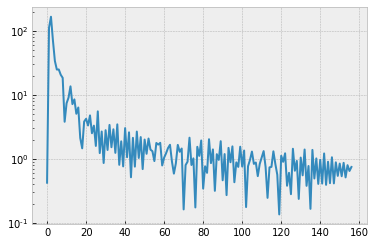

In [28]:
plt.plot(np.abs(np.fft.fft(sample.iloc[0, 1:316])[:157]))
plt.yscale("log")

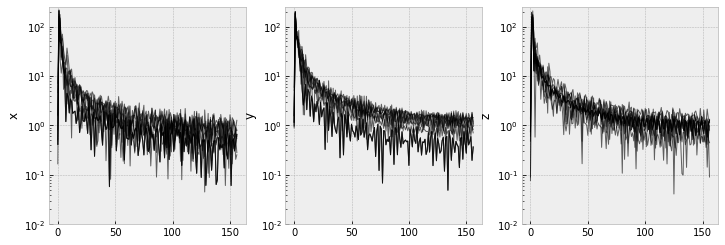

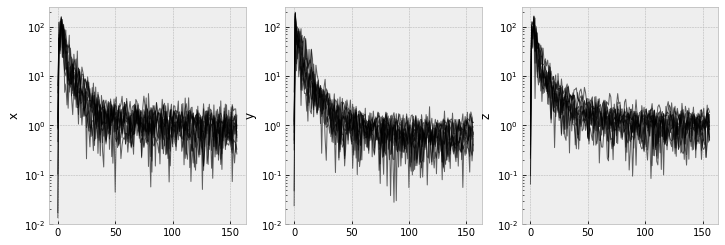

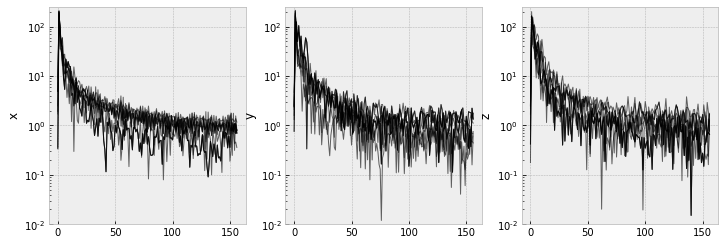

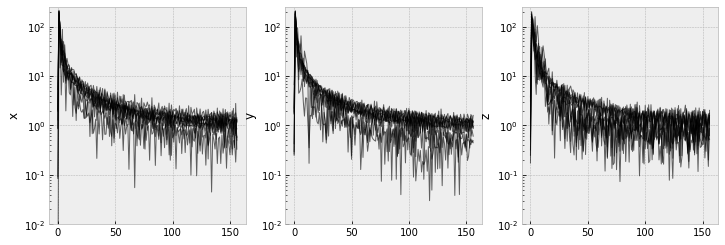

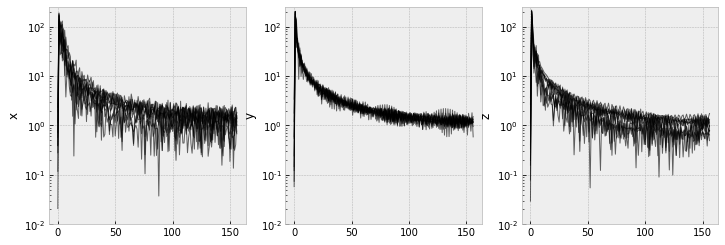

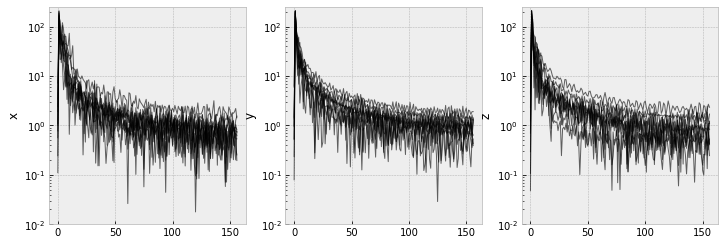

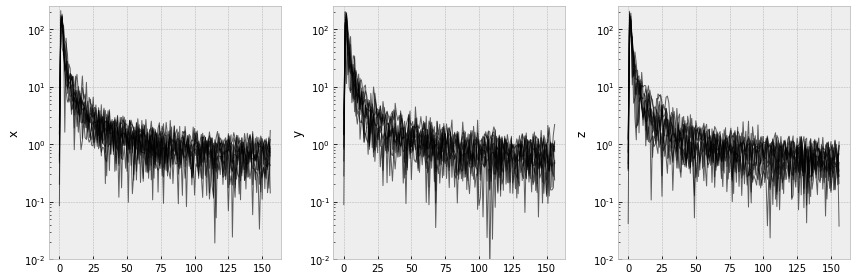

In [34]:
for i in range(1,9):
    sample = data[data.label==i].sample(10, replace=True)
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    
    for ri, row in sample.iterrows():
        fft_vals = np.abs(np.fft.fft(row.iloc[1:316])[:157])
        plt.plot(fft_vals, c="k", linewidth=1, alpha=0.6)
    plt.yscale("log")
    plt.ylabel("x")
    plt.ylim(0.01,250)
    
    plt.subplot(1,3,2)
    
    for ri, row in sample.iterrows():
        fft_vals = np.abs(np.fft.fft(row.iloc[316:631])[:157])
        plt.plot(fft_vals, c="k", linewidth=1, alpha=0.6)
    plt.yscale("log")
    plt.ylabel("y")
    plt.ylim(0.01,250)
    
    plt.subplot(1,3,3)
    
    for ri, row in sample.iterrows():
        fft_vals = np.abs(np.fft.fft(row.iloc[631:946])[:157])
        plt.plot(fft_vals, c="k", linewidth=1, alpha=0.6)
    plt.yscale("log")
    plt.ylabel("z")
    plt.ylim(0.01,250)
    
plt.tight_layout()

In [37]:
def get_band_power(r, n_freqs=10):
    """Calculate power in a low frequency band for each component"""
    s_x = np.abs(np.fft.fft(r[1:316]))[:157]
    s_y = np.abs(np.fft.fft(r[316:631]))[:157]
    s_z = np.abs(np.fft.fft(r[631:946]))[:157]
    s_a = np.abs(np.fft.fft(r[946:]))[:157]
    
    p_x = np.sum(s_x[:n_freqs]) / np.sum(s_x) 
    p_y = np.sum(s_y[:n_freqs]) / np.sum(s_y)
    p_z = np.sum(s_z[:n_freqs]) / np.sum(s_z)
    p_a = np.sum(s_a[:n_freqs]) / np.sum(s_a)
    
    return pd.Series([p_x, p_y, p_z, p_a], index=["p_x","p_y","p_z","p_a"])

In [38]:
get_band_power(data.iloc[0])

p_x    0.756900
p_y    0.536070
p_z    0.588002
p_a    0.732521
dtype: float64

In [39]:
data.apply(get_band_power, axis=1)

p_x       p_y       p_z       p_a
0    0.756900  0.536070  0.588002  0.732521
1    0.575887  0.517027  0.545039  0.855260
2    0.680597  0.631347  0.595280  0.841476
3    0.705297  0.569280  0.725079  0.799944
4    0.513319  0.605512  0.527122  0.747673
5    0.666733  0.694307  0.768051  0.867362
6    0.606084  0.589873  0.612939  0.733690
7    0.646582  0.758920  0.709356  0.927479
8    0.529924  0.530568  0.698268  0.743962
9    0.544763  0.512115  0.527481  0.915710
10   0.688522  0.550742  0.733317  0.779065
11   0.739800  0.770120  0.759181  0.916521
12   0.695187  0.739425  0.627017  0.835757
13   0.730320  0.639046  0.727219  0.768070
14   0.612072  0.647148  0.654625  0.701442
15   0.643409  0.570972  0.597078  0.825294
16   0.737147  0.511161  0.527818  0.819248
17   0.490621  0.580001  0.556482  0.640128
18   0.716857  0.605664  0.660185  0.848140
19   0.538818  0.609616  0.606039  0.692065
20   0.693280  0.697023  0.742013  0.872030
21   0.596479  0.619181  0.556082  0.719453
22   0.779580  0.610426  0.693072  0.754823
23   0.732753  0.695304  0.695440  0.873676
24   0.629850  0.662182  0.703826  0.785699
25   0.775132  0.735600  0.756738  0.879420
26   0.564744  0.639378  0.581865  0.750532
27   0.615774  0.561404  0.617315  0.785225
28   0.603335  0.670782  0.648322  0.869054
29   0.634586  0.688197  0.772433  0.924743
..        ...       ...       ...       ...
866  0.644468  0.628571  0.768233  0.824694
867  0.695304  0.542919  0.613652  0.846890
868  0.642287  0.553010  0.648018  0.786402
869  0.509216  0.673992  0.686671  0.837190
870  0.629338  0.603268  0.555583  0.818224
871  0.534847  0.583486  0.532853  0.774309
872  0.573042  0.595913  0.561826  0.694959
873  0.509197  0.673219  0.562487  0.813599
874  0.575054  0.632461  0.532733  0.763971
875  0.652891  0.520546  0.515316  0.861961
876  0.657971  0.675168  0.558014  0.669289
877  0.605228  0.679635  0.704736  0.792517
878  0.570352  0.534421  0.595002  0.881549
879  0.621766  0.697803  0.559923  0.809380
880  0.528767  0.535165  0.543163  0.821513
881  0.578314  0.435035  0.738299  0.736760
882  0.579118  0.709665  0.642162  0.784606
883  0.605189  0.529614  0.534161  0.759696
884  0.560029  0.542510  0.540792  0.870026
885  0.709156  0.588326  0.594773  0.738223
886  0.645384  0.691477  0.658231  0.708197
887  0.704404  0.761666  0.568896  0.750972
888  0.542064  0.594461  0.594361  0.735924
889  0.459576  0.529824  0.709869  0.744240
890  0.621595  0.515792  0.521800  0.854771
891  0.688319  0.735605  0.684345  0.826743
892  0.631925  0.742120  0.608835  0.795301
893  0.599079  0.676812  0.726241  0.741057
894  0.673385  0.733897  0.711324  0.833636
895  0.567820  0.652679  0.652401  0.754488

[896 rows x 4 columns]

In [40]:
features_fft = _

Text(0, 0.5, 'p_a')

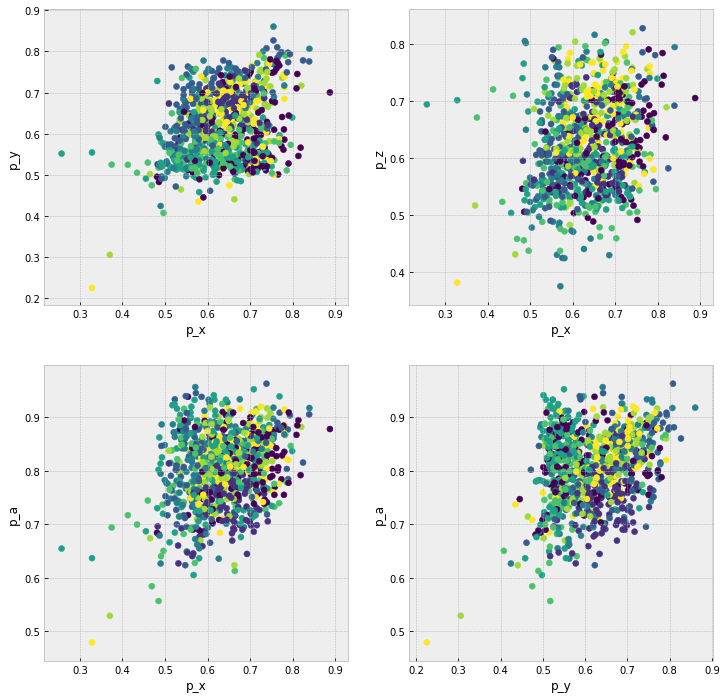

In [42]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.scatter(features_fft["p_x"], features_fft["p_y"],c=data["label"].values)
plt.xlabel("p_x")
plt.ylabel("p_y")

plt.subplot(2,2,2)
plt.scatter(features_fft["p_x"], features_fft["p_z"],c=data["label"].values)
plt.xlabel("p_x")
plt.ylabel("p_z")

plt.subplot(2,2,3)
plt.scatter(features_fft["p_x"], features_fft["p_a"],c=data["label"].values)
plt.xlabel("p_x")
plt.ylabel("p_a")

plt.subplot(2,2,4)
plt.scatter(features_fft["p_y"], features_fft["p_a"],c=data["label"].values)
plt.xlabel("p_y")
plt.ylabel("p_a")

# Transforming signals to images

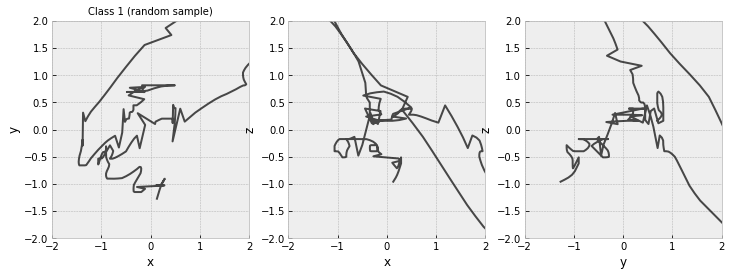

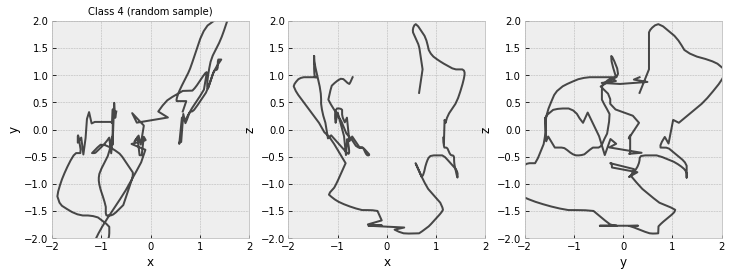

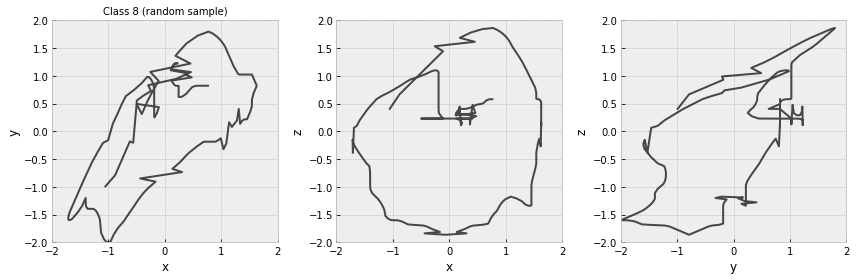

In [46]:
for i in range(1,9):
    sample = data[data.label==i].sample(1, replace=True)
    
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,3,1)
    for ri, row in sample.iterrows():
        plt.plot(row.iloc[1:316], row.iloc[316:631], linewidth=2, alpha=0.7, c="k")
    plt.ylim(-2,2)
    plt.xlim(-2,2)
    plt.ylabel("y")
    plt.xlabel("x")
    plt.title(f"Class {i} (random sample)", fontsize=10)
    
    plt.subplot(1,3,2)
    for ri, row in sample.iterrows():
        plt.plot(row.iloc[1:316], row.iloc[631:946], linewidth=2, alpha=0.7, c="k")
    plt.ylim(-2,2)
    plt.xlim(-2,2)
    plt.ylabel("z")
    plt.xlabel("x")
    
    plt.subplot(1,3,3)
    for ri, row in sample.iterrows():
        plt.plot(row.iloc[316:631], row.iloc[631:946], linewidth=2, alpha=0.7, c="k")
    plt.ylim(-2,2)
    plt.xlim(-2,2)
    plt.ylabel("z")
    plt.xlabel("y")
    
plt.tight_layout()